In [ ]:
import keras
from keras import layers
import numpy as np
import random
import tensorflow as tf
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

Create our model

In [ ]:
img_size=(28,28,1)

input_img = keras.Input(shape=img_size)
#create encoder part
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
encoded=layers.MaxPooling2D((2, 2), padding='same')(x)

#create decoder part
x = layers.UpSampling2D((2, 2))(encoded)
x=layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x=layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x=layers.UpSampling2D((2, 2))(x)
x=layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x=layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy')


In [ ]:
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_25 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_63 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_26 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0   

In [ ]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [ ]:
from keras.datasets import mnist
import numpy as np
#load data
(x_train, _), (x_test, _) = mnist.load_data()
#normalize data and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#add noise
x_train_noisy = noise(x_train)
x_test_noisy = noise(x_test)
#reshape images
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))


In [ ]:
#train the model 

autoencoder.fit(x_train_noisy, x_train,epochs=100,batch_size=128,shuffle=True,validation_split=0.2)



Epoch 1/100
375/375 [==============================] - 9s 22ms/step - loss: 0.3143 - val_loss: 0.3914
Epoch 2/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1554 - val_loss: 0.1430
Epoch 3/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1348 - val_loss: 0.1316
Epoch 4/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1260 - val_loss: 0.1238
Epoch 5/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1208 - val_loss: 0.1197
Epoch 6/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1172 - val_loss: 0.1166
Epoch 7/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1146 - val_loss: 0.1145
Epoch 8/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1126 - val_loss: 0.1126
Epoch 9/100
375/375 [==============================] - 8s 21ms/step - loss: 0.1110 - val_loss: 0.1111
Epoch 10/100
375/375 [==============================] - 8s 22ms/step - loss: 0.109

In [ ]:
encoder=keras.Model(input_img,encoded)

In [ ]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = autoencoder.predict(x_test_noisy)

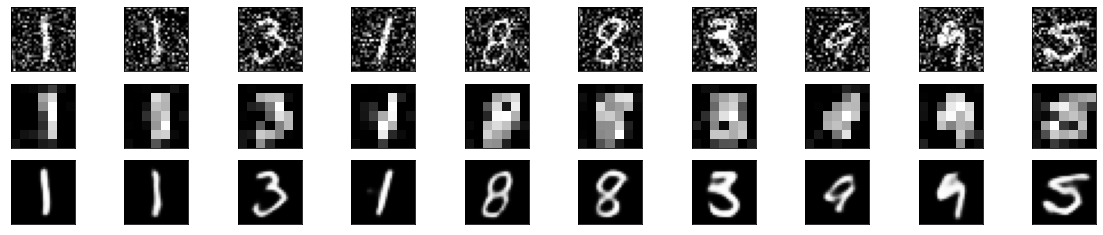

In [ ]:
import matplotlib.pyplot as plt
import random
n=10
indexes=random.sample(range(0, x_test.shape[0]), n+1)
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_noisy[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display original
    ax = plt.subplot(3, n, i + n)
    plt.imshow(encoded_imgs[indexes[i],:,:,4].reshape(7, 7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()